In [3]:
import numpy as np
import pandas as pd 
import os
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
direc = '/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train'
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    direc,
    image_size=(224, 224),  
    batch_size=32,         
    label_mode="int",       
    shuffle=True
)
val_direc = '/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val'
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_direc,
    image_size=(224, 224),  
    batch_size=32,         
    label_mode="int",       
    shuffle=True
)

Found 34792 files belonging to 5 classes.
Found 9940 files belonging to 5 classes.


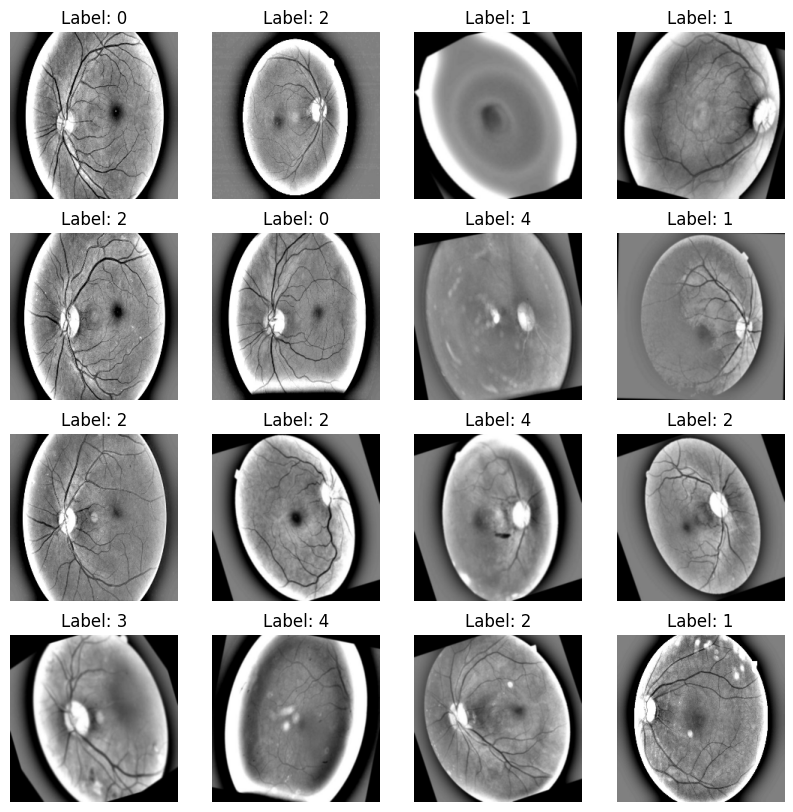

In [31]:
for images, labels in dataset.take(1): 
    images = images.numpy() 
    labels = labels.numpy()
    break  

plt.figure(figsize=(10, 10))
for i in range(16):  
    plt.subplot(4, 4, i + 1) 
    plt.imshow(images[i].astype("uint8"))  
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")  # Hide axes

plt.show()

In [32]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(5, activation="softmax")(x)  

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [33]:
epochs = 25

history = model.fit(
    dataset,
    epochs=epochs,
    verbose=1,
    validation_data=val_dataset
)

Epoch 1/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 162s 117ms/step - accuracy: 0.4663 - loss: 1.2285 - val_accuracy: 0.5451 - val_loss: 1.0655
Epoch 2/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - accuracy: 0.5247 - loss: 1.0970 - val_accuracy: 0.5656 - val_loss: 1.0108
Epoch 3/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 96s 89ms/step - accuracy: 0.5409 - loss: 1.0645 - val_accuracy: 0.5748 - val_loss: 0.9868
Epoch 4/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 97s 89ms/step - accuracy: 0.5474 - loss: 1.0443 - val_accuracy: 0.5757 - val_loss: 0.9760
Epoch 5/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 97s 89ms/step - accuracy: 0.5552 - loss: 1.0294 - val_accuracy: 0.5831 - val_loss: 0.9634
Epoch 6/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 97s 89ms/step - accuracy: 0.5594 - loss: 1.0110 - val_accuracy: 0.5848 - val_loss: 0.9558
Epoch 7/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - accuracy: 0.5672 - loss: 1.0033 - val_accuracy: 0.6006 - val_loss: 0.9320
Epoch 8/25
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - accuracy: 0.5716

In [34]:
from sklearn.metrics import classification_report

class_names = {0: 'No DR', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative DR'}

test_folder = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_folder,
    image_size=(224, 224),
    batch_size=32,
    label_mode="int",
    shuffle=False  
)

y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

class_names = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))



Found 4971 files belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

In [57]:
model.save("diabetic_retinopathy_model.h5")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.252853 to fit



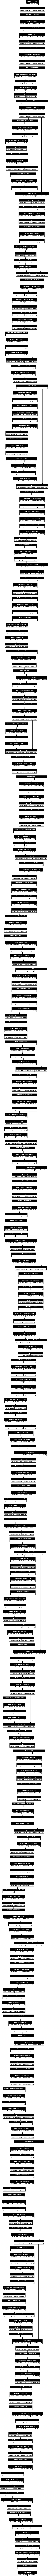

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)
